In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [2]:
classes = [u'\u0966', u'\u0967', u'\u0968', u'\u0969', u'\u096A', u'\u096B', u'\u096C', u'\u096D', u'\u096E', u'\u096F', u'\u0905', u'\u0906',
           u'\u0907', u'\u0908', u'\u0909', u'\u090A', u'\u090F', u'\u0910', u'\u0913', u'\u0914', u'\u0905'+u'\u0902', u'\u0905'+u'\u0903', u'\u0915', 
           u'\u0916', u'\u0917', u'\u0918', u'\u0919', u'\u091A', u'\u091B', u'\u091C', u'\u091D', u'\u091E', u'\u091F', u'\u0920', u'\u0921', 
           u'\u0922', u'\u0923', u'\u0924', u'\u0925', u'\u0926', u'\u0927', u'\u0928', u'\u092A', u'\u092B', u'\u092C', u'\u092D', 
           u'\u092E', u'\u092F', u'\u0930', u'\u0932', u'\u0935', u'\u0936', u'\u0937', u'\u0938', u'\u0939', 'क्ष', u'\u0924'+u'\u094D'+u'\u0930', 
           'ज्ञ' ]
print(classes[:])

['०', '१', '२', '३', '४', '५', '६', '७', '८', '९', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ए', 'ऐ', 'ओ', 'औ', 'अं', 'अः', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'क्ष', 'त्र', 'ज्ञ']


In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = './dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (32,32)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = './dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (32,32)
)

Found 10316 files belonging to 58 classes.
Found 2596 files belonging to 58 classes.


In [4]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(58, activation='softmax'))

ValueError: Exception encountered when calling layer "max_pooling2d_2" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_2/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,256].

Call arguments received by layer "max_pooling2d_2" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 256), dtype=float32)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                        

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=15, validation_data=validation_ds)

Epoch 1/15
323/323 [==============================] - 33s 93ms/step - loss: 3.2626 - accuracy: 0.1811 - val_loss: 1.3451 - val_accuracy: 0.6317
Epoch 2/15
323/323 [==============================] - 30s 92ms/step - loss: 1.3611 - accuracy: 0.6066 - val_loss: 0.6186 - val_accuracy: 0.8070
Epoch 3/15
323/323 [==============================] - 30s 93ms/step - loss: 0.8750 - accuracy: 0.7361 - val_loss: 0.5125 - val_accuracy: 0.8467
Epoch 4/15
323/323 [==============================] - 30s 92ms/step - loss: 0.6574 - accuracy: 0.7960 - val_loss: 0.3829 - val_accuracy: 0.8817
Epoch 5/15
323/323 [==============================] - 30s 92ms/step - loss: 0.5310 - accuracy: 0.8322 - val_loss: 0.3532 - val_accuracy: 0.8921
Epoch 6/15
323/323 [==============================] - 30s 93ms/step - loss: 0.4552 - accuracy: 0.8560 - val_loss: 0.3197 - val_accuracy: 0.9025
Epoch 7/15
323/323 [==============================] - 30s 93ms/step - loss: 0.4010 - accuracy: 0.8672 - val_loss: 0.3006 - val_accuracy:

In [11]:
import cv2
import matplotlib.pyplot as plt

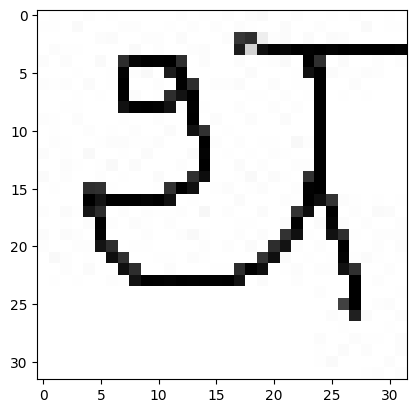

In [85]:
test_img = cv2.imread('test.jpg')
test_img  = cv2.resize(test_img, (32,32))
plt.imshow(test_img)

In [86]:
test_input = test_img.reshape((1,32,32,3))

In [87]:
prob = model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


In [52]:
pred = prob.argmax(axis=-1)
pred

array([27], dtype=int64)

In [53]:
print('Predicted as: ', classes[pred[0]])

Predicted as:  च


In [12]:
#For testing words segmented by the other script
import os
import numpy as np

In [37]:
images = [img for img in os.listdir('./temp')]
len(images)

3

In [38]:
predicted_string = ''

In [39]:
for img in images:
    test_img = cv2.imread(os.path.join('./temp', img))
    test_img = cv2.bitwise_not(test_img)
    test_img = cv2.GaussianBlur(test_img, (5,5), 0)
    kernel = np.ones((1,1),np.uint8)
    test_img = cv2.erode(test_img,kernel,iterations = 1)
    kernel = np.ones((5,5),np.uint8)
    test_img = cv2.dilate(test_img, kernel, iterations = 2)
    test_img = cv2.bitwise_not(test_img)
    test_img  = cv2.resize(test_img, (32,32))
    #cv2.imshow(img, test_img)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    test_input = test_img.reshape((1,32,32,3))
    prob = model.predict(test_input)
    pred = prob.argmax(axis=-1)
    print('Predicted as: ', classes[pred[0]])
    predicted_string = predicted_string + classes[pred[0]]

1/1 [==============================] - 0s 25ms/step
Predicted as:  १
1/1 [==============================] - 0s 24ms/step
Predicted as:  ०
1/1 [==============================] - 0s 25ms/step
Predicted as:  ०


In [40]:
predicted_string

'१००'